In [118]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

chosen_counties=["HARRIS COUNTY", 
                 "MONTGOMERY COUNTY", 
                 "GALVESTON COUNTY", 
                 "TRINITY COUNTY", 
                 "FORT BEND COUNTY"]


In [31]:
real_estate_data=pd.read_csv("summary_csv/zillow_df_by_county_merged.csv")
real_estate_data.head()

,County,RegionType,StateName,Date,zhvi_single_family_homes_by_county,zhvi_condo_coop_homes_by_county,zhvi_5plus_homes_by_county,zhvi_4_homes_by_county,zhvi_3_homes_by_county,zhvi_2_homes_by_county,zhvi_1_homes_by_county,Year
0,HARRIS COUNTY,County,TX,1996-01-31,102970.0,88773.0,220080.0,137435.0,88562.0,67359.0,82023.0,1996
1,FORT BEND COUNTY,County,TX,1996-01-31,139204.0,101287.0,244549.0,164644.0,94637.0,86009.0,98842.0,1996
2,MONTGOMERY COUNTY,County,TX,1996-01-31,146201.0,96672.0,310134.0,192314.0,121039.0,86705.0,64666.0,1996
3,GALVESTON COUNTY,County,TX,1996-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
4,TRINITY COUNTY,County,TX,1996-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996


In [3]:
population_data=pd.read_csv("summary_csv/reset_totalpop.csv")
population_data

,County,Year,Estimated Population
0,HARRIS COUNTY,2018,4676913
1,FORT BEND COUNTY,2018,789269
2,MONTGOMERY COUNTY,2018,590127
3,TRINITY COUNTY,2018,14672
4,GALVESTON COUNTY,2018,337639
5,HARRIS COUNTY,2019,4709243
6,FORT BEND COUNTY,2019,812737
7,MONTGOMERY COUNTY,2019,607583
8,TRINITY COUNTY,2019,14675
9,GALVESTON COUNTY,2019,341541


In [4]:
unemployment_data=pd.read_csv("summary_csv/reset_totalunemply.csv")
unemployment_data

,County,Year,Unemployment Rate (%)
0,HARRIS COUNTY,2018,4.4
1,FORT BEND COUNTY,2018,4.0
2,MONTGOMERY COUNTY,2018,3.8
3,TRINITY COUNTY,2018,5.2
4,GALVESTON COUNTY,2018,4.7
5,HARRIS COUNTY,2019,3.9
6,FORT BEND COUNTY,2019,3.5
7,MONTGOMERY COUNTY,2019,3.4
8,TRINITY COUNTY,2019,4.8
9,GALVESTON COUNTY,2019,4.0


In [9]:
summary1=population_data.merge(unemployment_data, on=['County','Year'])
summary1

,County,Year,Estimated Population,Unemployment Rate (%)
0,HARRIS COUNTY,2018,4676913,4.4
1,FORT BEND COUNTY,2018,789269,4.0
2,MONTGOMERY COUNTY,2018,590127,3.8
3,TRINITY COUNTY,2018,14672,5.2
4,GALVESTON COUNTY,2018,337639,4.7
5,HARRIS COUNTY,2019,4709243,3.9
6,FORT BEND COUNTY,2019,812737,3.5
7,MONTGOMERY COUNTY,2019,607583,3.4
8,TRINITY COUNTY,2019,14675,4.8
9,GALVESTON COUNTY,2019,341541,4.0


In [79]:
summary2=real_estate_data.merge(summary1, on=['County','Year'])
summary2['Date']=pd.to_datetime(summary2['Date'])


In [81]:
summary2['County'].unique()

array(['HARRIS COUNTY', 'FORT BEND COUNTY', 'MONTGOMERY COUNTY',
       'GALVESTON COUNTY', 'TRINITY COUNTY'], dtype=object)

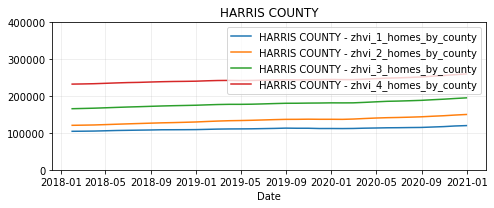

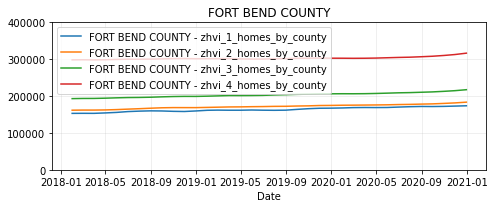

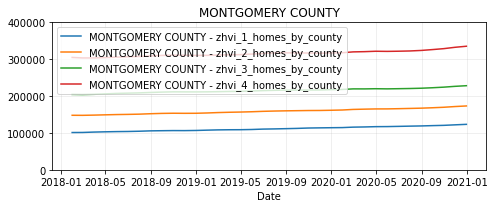

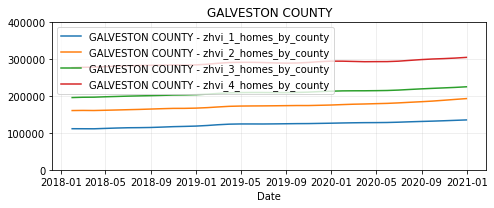

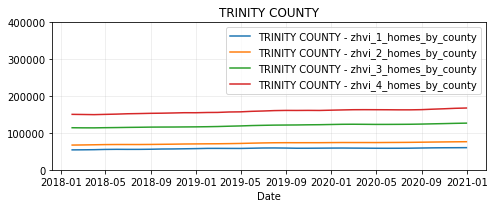

In [111]:
count=0
# plt.figure(figsize=(10,15))

for county in summary2['County'].unique():
    data=summary2[summary2['County']==county]
    plt.figure(figsize=(7,3))
#     plt.figure()
#     plt.scatter(data['Year'],data['zhvi_single_family_homes_by_county'], label=data['zhvi_single_family_homes_by_county'])
    plt.plot(data['Date'],data['zhvi_1_homes_by_county'], label=f"{county} - zhvi_1_homes_by_county")#, marker='o')
    plt.plot(data['Date'],data['zhvi_2_homes_by_county'], label=f"{county} - zhvi_2_homes_by_county")
    plt.plot(data['Date'],data['zhvi_3_homes_by_county'], label=f"{county} - zhvi_3_homes_by_county")
    plt.plot(data['Date'],data['zhvi_4_homes_by_county'], label=f"{county} - zhvi_4_homes_by_county")

    plt.xlabel('Date')
    #     plt.xticks(np.arange(1,len(data['Date']),1),data['Date'].dt.year())
    plt.title(str(county))
    plt.legend()
    plt.tight_layout()
    plt.ylim([0,400000])
    plt.grid(alpha=0.25)
#     plt.show()
    

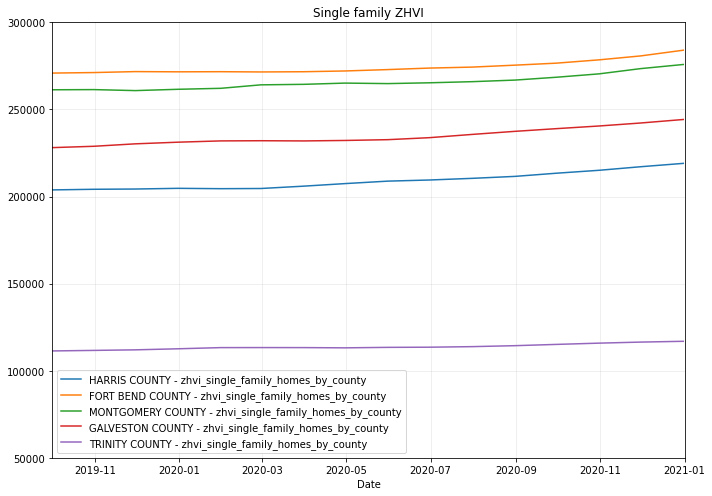

In [123]:
count=0
# plt.figure(figsize=(10,15))
plt.figure(figsize=(10,7))
    
for county in summary2['County'].unique():
    data=summary2[summary2['County']==county]
#     plt.figure()
    plt.plot(data['Date'],data['zhvi_single_family_homes_by_county'], label=f"{county} - zhvi_single_family_homes_by_county")

    plt.xlabel('Date')
    #     plt.xticks(np.arange(1,len(data['Date']),1),data['Date'].dt.year())
    plt.title("Single family ZHVI")
    plt.legend()
    plt.tight_layout()
    plt.ylim([50000,300000])
    plt.xlim([dt.date(2019, 10, 1), dt.date(2021, 1, 1)])
    plt.grid(alpha=0.25)
#     plt.show()
    